In [45]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [9]:
rev_m=170
rev_std=20
iterations=1000

In [26]:
rev=np.random.normal(rev_m,rev_std,iterations)
rev

array([197.22977724, 177.01817   , 147.52124877, 139.29164207,
       178.16977193, 177.8403789 , 194.72198921, 159.11776899,
       170.2911619 , 163.42053484, 136.49668504, 198.02448618,
       182.645622  , 164.11300674, 191.06761115, 163.98740839,
       176.50023745, 162.91689225, 148.8580999 , 137.24749743,
       155.6984151 , 160.06590867, 157.46535634, 179.67136368,
       183.36882717, 171.27068359, 150.8480717 , 166.02664147,
       155.63755198, 174.77606921, 180.09368188, 173.54636858,
       186.57253309, 159.11194268, 136.81519899, 191.09918952,
       143.86218301, 199.52587401, 186.39503111, 172.4502557 ,
       206.1760336 , 192.60731574, 153.00527923, 192.6150662 ,
       178.08773884, 150.77200935, 154.7612614 , 206.68090888,
       143.0699651 , 181.74769049, 199.19955763, 123.99268739,
       181.34959102, 169.59302946, 167.40760527, 181.6197364 ,
       167.01685347, 193.37515167, 211.34472592, 118.1863937 ,
       194.58250866, 145.91241666, 152.54374462, 151.55

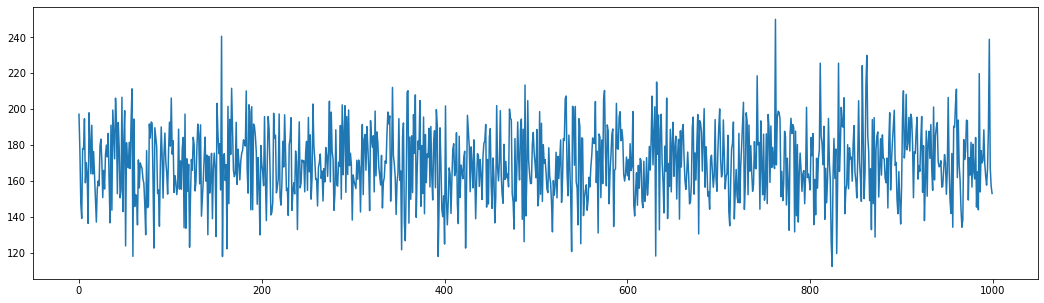

In [27]:
plt.figure(figsize=(18,5))
plt.plot(rev)

In [32]:
COGS = (rev*np.random.normal(0.6,0.1))

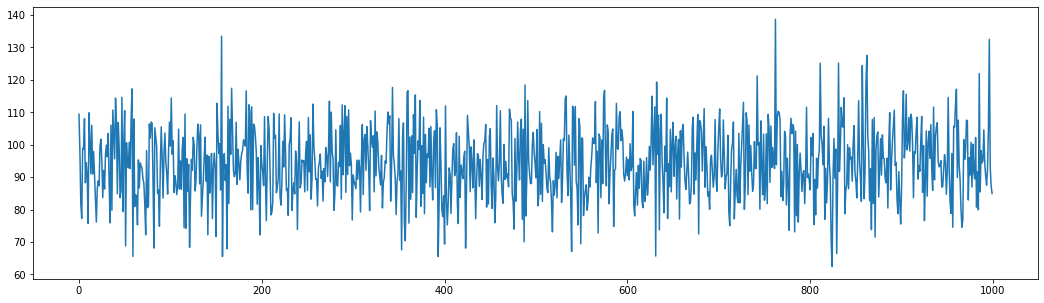

In [33]:
plt.figure(figsize=(18,5))
plt.plot(COGS)

In [34]:
COGS.mean()

94.28844440142092

In [35]:
COGS.std()

11.10200155358847

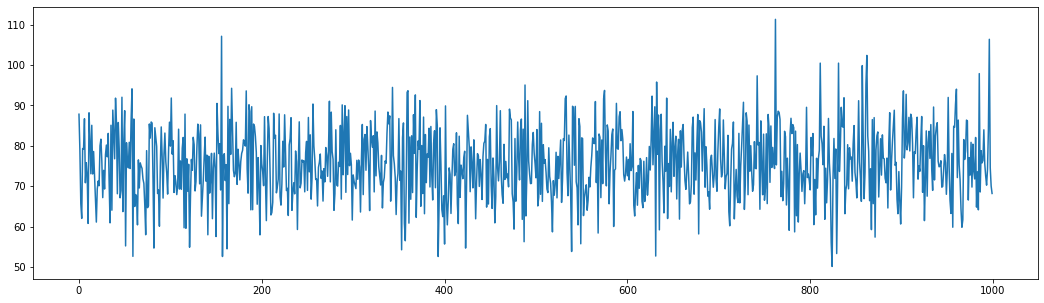

In [38]:
Gross_Profit = rev - COGS
Gross_Profit

plt.figure(figsize=(18,5))
plt.plot(Gross_Profit)

In [39]:
max(Gross_Profit)

111.31143374924014

In [40]:
min(Gross_Profit)

50.12643977349207

In [41]:
Gross_Profit.mean()

75.68119030458267

In [42]:
Gross_Profit.std()

8.911088709469043

(array([  5.,  11.,  15.,  34.,  51.,  93., 122., 138., 125., 111.,  99.,
         90.,  59.,  26.,  12.,   2.,   3.,   1.,   2.,   1.]),
 array([ 50.12643977,  53.18568947,  56.24493917,  59.30418887,
         62.36343857,  65.42268827,  68.48193797,  71.54118767,
         74.60043736,  77.65968706,  80.71893676,  83.77818646,
         86.83743616,  89.89668586,  92.95593556,  96.01518526,
         99.07443495, 102.13368465, 105.19293435, 108.25218405,
        111.31143375]),
 <BarContainer object of 20 artists>)

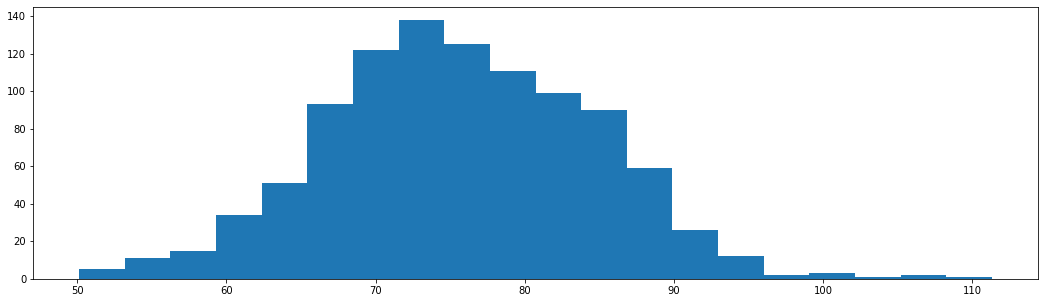

In [44]:
#Histograma
plt.figure(figsize=(18,5))
#plt.hist(Gross_Profit,bins=[40,50,60,70,80,90,100,110,120])
plt.hist(Gross_Profit,bins=20)

# Movimiento browniano

$$
daily\_returns = e^{r}
$$
$$
r = drift + stdev \cdot z
$$
$$
drift = u - \frac{1}{2} \cdot var
$$

# Pronosticos
$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$


In [47]:
ticker = 'PG'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2010-1-1')['Adj Close']

In [48]:
log_returns=np.log(1+data.pct_change())
log_returns

,PG
Date,
2010-01-04,NaN
2010-01-05,0.000327
2010-01-06,-0.004754
2010-01-07,-0.005438
2010-01-08,-0.001323
...,...
2021-03-18,0.002178
2021-03-19,-0.005376
2021-03-22,0.016810


<AxesSubplot:xlabel='Date'>

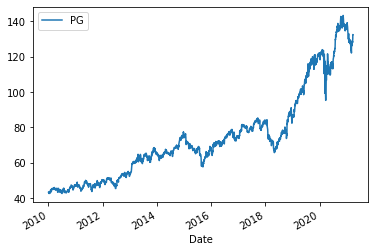

In [49]:
data.plot()

<AxesSubplot:xlabel='Date'>

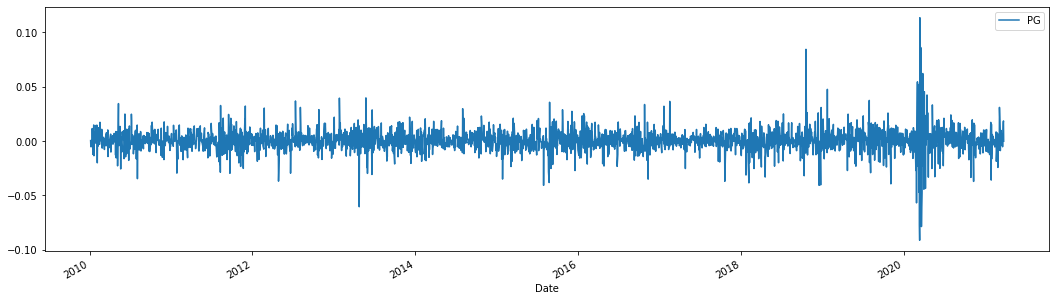

In [50]:
log_returns.plot(figsize=(18,5))

In [53]:
u=log_returns.mean()
var=log_returns.var()

# Drift

In [54]:
drift=u-0.5*var
drift

PG    0.000338
dtype: float64

In [55]:
type(drift)

pandas.core.series.Series

# stdev

In [57]:
stdev = log_returns.std()

In [58]:
type(stdev)

pandas.core.series.Series

In [59]:
np.array(drift)

array([0.00033801])

In [60]:
drift.values

array([0.00033801])

In [61]:
stdev.values

array([0.01080717])

# Z Variable Aleatoria

In [86]:
norm.ppf(0.995)

2.5758293035489004

In [65]:
x=np.random.rand(10,2) # Crear un array 10x2
x

array([[0.8557003 , 0.8484481 ],
       [0.93137173, 0.64374944],
       [0.92247118, 0.62105458],
       [0.02153137, 0.78162863],
       [0.70756382, 0.86784715],
       [0.1306324 , 0.07039581],
       [0.43514504, 0.84764322],
       [0.64083955, 0.74400756],
       [0.86025318, 0.31551614],
       [0.62732608, 0.99544265]])

In [66]:
norm.ppf(x)

array([[ 1.06119914,  1.02980023],
       [ 1.48608539,  0.36849908],
       [ 1.42189188,  0.30825167],
       [-2.02310104,  0.77770536],
       [ 0.54628162,  1.11627207],
       [-1.12340673, -1.47284947],
       [-0.16329004,  1.02637776],
       [ 0.36070378,  0.65575017],
       [ 1.08145756, -0.4802744 ],
       [ 0.32477966,  2.60772175]])

In [67]:
z=norm.ppf(np.random.rand(10,2))
z

array([[-0.32822774, -1.17688325],
       [-0.55290496,  0.79203783],
       [ 1.1605213 , -0.57507943],
       [ 0.83555782,  0.33278739],
       [ 0.83281675,  0.71376405],
       [ 0.79782292, -1.11543892],
       [ 0.37402428, -0.66541542],
       [-0.11480787, -0.94990897],
       [-1.03046721,  0.26075569],
       [ 1.0470798 , -0.55381832]])

In [68]:
t_intervals=1000
iterations=10

In [70]:
daily_returns=np.exp(drift.values*norm.ppf(np.random.rand(t_intervals,iterations)))

In [71]:
daily_returns

array([[0.99977375, 1.00036605, 0.99974088, ..., 0.99971467, 1.00012799,
        0.99987429],
       [1.00013171, 1.00020015, 0.99949171, ..., 1.00021214, 1.00017318,
        1.00019961],
       [1.00065024, 0.99985345, 0.99975853, ..., 0.99949416, 0.99980451,
        1.00023581],
       ...,
       [1.00002688, 0.99960906, 0.9999515 , ..., 1.00049555, 1.00009826,
        0.99976431],
       [1.00040443, 0.99954763, 1.00026433, ..., 1.0000728 , 0.9996729 ,
        0.99989649],
       [0.99984705, 0.99927288, 0.99933981, ..., 1.00058061, 1.00047977,
        0.99958673]])

# Pronosticos
$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$


In [72]:
S0=data.iloc[-1]
S0

PG    132.559998
Name: 2021-03-24 00:00:00, dtype: float64

In [74]:
price_list=np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
price_list[0]=S0
price_list

array([[132.55999756, 132.55999756, 132.55999756, ..., 132.55999756,
        132.55999756, 132.55999756],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [77]:
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]
price_list

array([[132.55999756, 132.55999756, 132.55999756, ..., 132.55999756,
        132.55999756, 132.55999756],
       [132.57745748, 132.58653009, 132.49261814, ..., 132.58811841,
        132.58295414, 132.58645782],
       [132.66366491, 132.56709941, 132.46062559, ..., 132.5210499 ,
        132.55703535, 132.6177233 ],
       ...,
       [134.9606646 , 134.32429011, 131.96395198, ..., 131.85327472,
        132.7439529 , 133.15515126],
       [135.01524653, 134.26352582, 131.99883377, ..., 131.86287308,
        132.70053249, 133.14136803],
       [134.99459617, 134.16590067, 131.91168935, ..., 131.93943374,
        132.76419872, 133.08634499]])

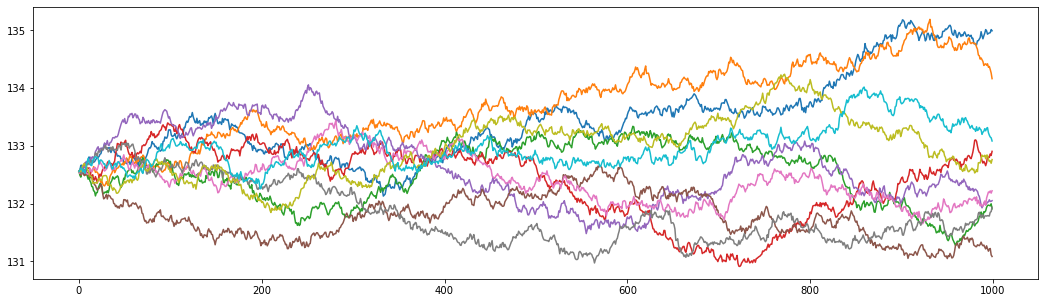

In [80]:
plt.figure(figsize=(18,5))
plt.plot(price_list)